In [1]:
import pandas as pd

krx_list = pd.read_html("상장법인목록.xls")
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,원방테크,53080,일반 목적용 기계 제조업,클린룸 설비,2020-09-24,12월,김규범,http://wonbangtech.com,충청북도
1,비나텍,126340,일차전지 및 축전지 제조업,초고용량 커패시터(슈퍼커패시터),2020-09-23,12월,성도경,http://www.vina.co.kr,전라북도
2,엔에이치스팩17호,359090,금융 지원 서비스업,금융 지원 서비스,2020-09-23,12월,이병훈,NaN,서울특별시
3,박셀바이오,323990,자연과학 및 공학 연구개발업,"항암면역세포치료제(자연살해세포, 수지상세포, CAR-T 및 인터루킨 기반 항암제)",2020-09-22,12월,"이준행, 정광준",http://www.vaxcell-bio.com,전라남도
4,티와이홀딩스,363280,기타 금융업,지주사업,2020-09-22,12월,유종연,http://www.ty-holdings.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
2374,CJ대한통운,120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2375,메리츠화재,60,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2376,경방,50,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2377,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [2]:
# 종목코드가 6자리여야하는데 잘못 표시됨 map을 이용 채우자

krx_list[0].종목코드 = krx_list[0].종목코드.map("{:06d}".format)
df = krx_list[0]

In [3]:
# 셀트리온 일일 종가 웹 스크래핑
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&page=1"
with urlopen(url) as doc:
    html = BeautifulSoup(doc, "lxml")
    pgrr = html.find("td", class_="pgRR")
    print(pgrr.a["href"])

/item/sise_day.nhn?code=068270&page=377


In [4]:
print(pgrr.prettify())

<td class="pgRR">
 <a href="/item/sise_day.nhn?code=068270&amp;page=377">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>



In [5]:
with urlopen(url) as doc:
    html = BeautifulSoup(doc, "lxml")
    pgrr = html.find("td", class_="pgRR")
    s = str(pgrr.a["href"]).split("=")
    last_page = s[-1]

In [6]:
df = pd.DataFrame()
sise_url = "https://finance.naver.com/item/sise_day.nhn?code=068270"

for page in range(1,int(last_page)+1): #처음 부터 마지막 페이지 까지
    page_url = "{}&page={}".format(sise_url, page)
    df = df.append(pd.read_html(page_url, header=0)[0])
    
df.dropna(inplace= True)

In [7]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.10.08,262000.0,1500.0,263000.0,271500.0,262000.0,864365.0
2,2020.10.07,260500.0,2500.0,259000.0,261500.0,256500.0,492558.0
3,2020.10.06,258000.0,3500.0,255500.0,259000.0,254500.0,556717.0
4,2020.10.05,254500.0,3000.0,259000.0,260500.0,251000.0,639048.0
5,2020.09.29,257500.0,2500.0,256500.0,258500.0,251000.0,686838.0
...,...,...,...,...,...,...,...
2,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
3,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
4,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
5,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0


In [8]:
# OHLC 와 캔들 차트

df = df.iloc[0:30]
df.sort_values(by="날짜",inplace= True)

/Users/dongmin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


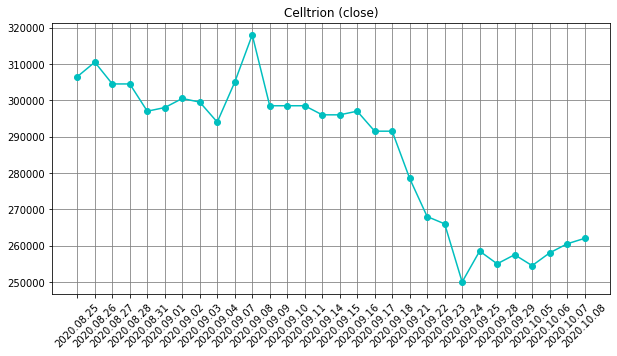

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Celltrion (close)")
plt.xticks(rotation = 45)
plt.plot(df.날짜, df.종가, "co-")
plt.grid(color = "gray")
plt.show()

In [14]:
# 신버전 캔들 차트 그리기

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import mplfinance as mpf

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&page=1"
with urlopen(url) as doc:
    html = BeautifulSoup(doc, "lxml")
    pgrr = html.find("td", class_="pgRR")
    s = str(pgrr.a["href"]).split("=")
    last_page = s[-1]

df = pd.DataFrame()
sise_url = "https://finance.naver.com/item/sise_day.nhn?code=068270"

for page in range(1,int(last_page)+1): #처음 부터 마지막 페이지 까지
    page_url = "{}&page={}".format(sise_url, page)
    df = df.append(pd.read_html(page_url, header=0)[0])
    
df.dropna(inplace= True)
df = df.iloc[0:30] # 최근 한달만 슬라이싱
df.rename(columns={"날짜":"Date", "시가":"Open", "고가":"High","저가":"Low","종가":"Close","거래량":"Volume"},inplace =True)
# 영어를 한글로
df.sort_values(by="Date",inplace= True) # 오름 차순 정렬
df.index = pd.to_datetime(df.Date) # 형변환
df = df[["Open","High","Low","Close","Volume"]] # 구조 변경


AttributeError: module 'mplfinance' has no attribute 'subplot'

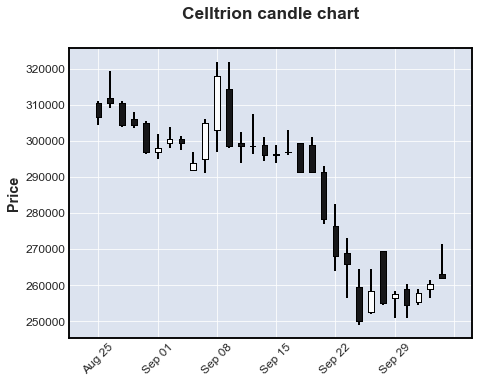

In [15]:
mpf.plot(df, title="Celltrion candle chart", type="candle")

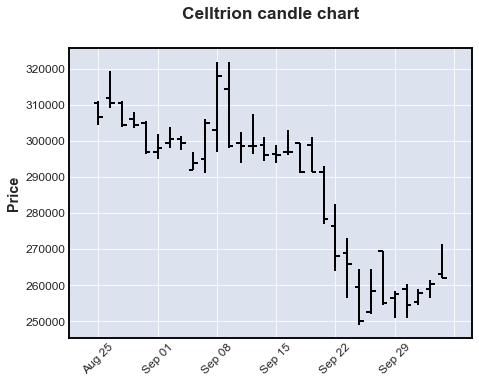

In [16]:
mpf.plot(df, title="Celltrion candle chart", type="ohlc")

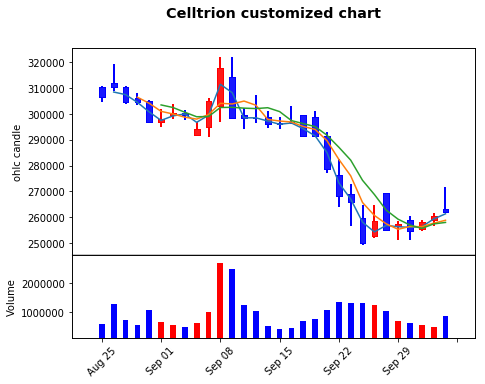

In [18]:
# 캔들 차트 색추가 및 거래량 추가

# plot 여러 호출 인자 한번에 쓰기위한 딕셔너리
kwargs = dict(title="Celltrion customized chart", type = "candle", mav=(2, 4, 6), volume = True, ylabel="ohlc candle")
mc = mpf.make_marketcolors(up="r",down="b",inherit=True) #상승은 레드 하락은 블루 컬러지정
s = mpf.make_mpf_style(marketcolors=mc) # 스타일 객체 생성
mpf.plot(df, **kwargs, style = s)